# EE5708: Data Analytics Laboratory 

### ASSIGNMENT 3: Naive Bayes Classifier

**NAME**: BONESHWAR V K

**ROLL NUMBER** : BS20B012

#### IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

#### IMPORTING DATASET

In [2]:
df = pd.read_excel("adult.xlsx", names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 
                                'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'salary'])
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


#### DATA CLEANING

Data cleaning is perfomred on the given dataset to ensure that the abnormalities and other unwanted data are removed hence the generalization can be made bit easier. All columns of type 'object' are first trimmed (whitespaces are removed) and then the columns with '?' are filled with the majority of the respective column.

In [3]:
# Cleaning the data

for col in df.select_dtypes(include = ['object']).columns:
    df[col] = df[col].apply(lambda x: x.strip())
df[df == '?'] = np.nan
cols_fill_with_mode = ['workclass', 'occupation', 'native-country']
for col in cols_fill_with_mode:
    df[col].fillna(df[col].mode()[0], inplace=True)
    
# Visualizing the info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  32560 non-null  object
 14  salary          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
cat_cols = ['workclass', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'salary']
df2 = df.copy()
for col in cat_cols:
    df[col] = LabelEncoder().fit_transform(df[col])
y = df['salary'].to_numpy()
df = df.drop(columns = ['fnlwgt', 'capital-gain', 'capital-loss', 'native-country'])
df_x = df.drop(columns = ['salary'])
X = df_x.to_numpy()

df

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,salary
0,50,5,9,12,2,3,0,4,1,13,0
1,38,3,11,8,0,5,1,4,1,40,0
2,53,3,1,6,2,5,0,2,1,40,0
3,28,3,9,12,2,9,5,2,0,40,0
4,37,3,12,13,2,3,5,4,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,7,11,2,12,5,4,0,38,0
32556,40,3,11,8,2,6,0,4,1,40,1
32557,58,3,11,8,6,0,4,4,0,40,0
32558,22,3,11,8,4,0,3,4,1,20,0


In [6]:
# Function defined
def get_prob(column, attribute):
    #column is workclass and attrib is private
    people_with_attrib = len(df2[df2[column] == attribute])
    high_salary_with_attrib = len(df2[(df2[column] == attribute) & df['salary'] == 1])
    return high_salary_with_attrib/people_with_attrib

# Gives the count of people belonging to different race.
df2['race'].value_counts()

White                 27815
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

Text(0.5, 0.98, 'Probabilty of earning more than \\$50,000')

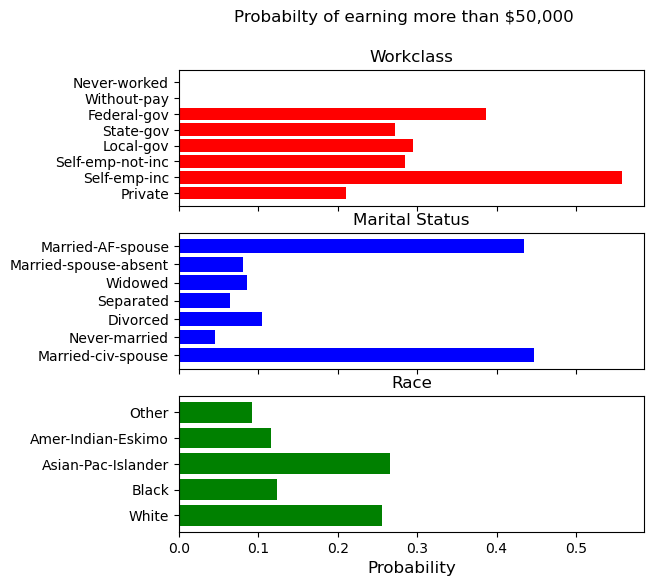

In [11]:
attribs_workclass = ['Private', 'Self-emp-inc', 'Self-emp-not-inc', 'Local-gov', 'State-gov', 'Federal-gov', 'Without-pay', 'Never-worked']
attribs_marital = ['Married-civ-spouse', 'Never-married', 'Divorced', 'Separated', 'Widowed', 'Married-spouse-absent', 'Married-AF-spouse']
attribs_race = ['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other']
fig, axs = plt.subplots(3, sharex=True, figsize = (6,6))

axs[0].barh(attribs_workclass, [get_prob('workclass', attrib) for attrib in attribs_workclass],color = 'red')
axs[0].set_title("Workclass")
axs[1].barh(attribs_marital, [get_prob('marital-status', attrib) for attrib in attribs_marital], color = 'blue')
axs[1].set_title("Marital Status")
axs[2].barh(attribs_race, [get_prob('race', attrib) for attrib in attribs_race], color = 'green')
axs[2].set_title("Race")
axs[2].set_xlabel("Probability", fontsize = 12)

fig.suptitle('Probabilty of earning more than \$50,000')

In [12]:
clf = GaussianNB()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state=42)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))
probab = clf.predict_proba(X_test)
print(probab.shape)

0.7675061425061425
(6512, 2)


In [13]:
plt.rcParams['font.size'] = 12
plt.rcParams['font.style'] = 'normal'

Text(0, 0.5, 'No. of years of education')

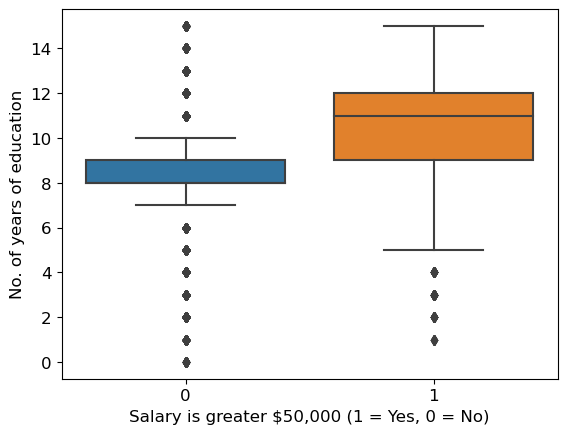

In [14]:
ax = sns.boxplot(x = df['salary'], y = df['education-num'])
ax.set_xlabel('Salary is greater $50,000 (1 = Yes, 0 = No)')
ax.set_ylabel('No. of years of education')



Text(0, 0.5, 'Age in years')

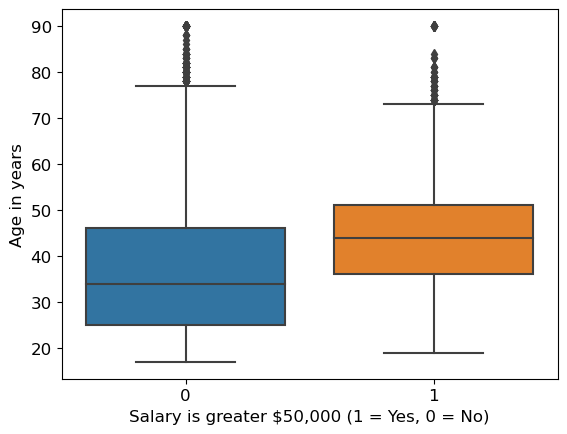

In [15]:
ax = sns.boxplot(x = df['salary'], y = df['age'])
ax.set_xlabel('Salary is greater $50,000 (1 = Yes, 0 = No)')
ax.set_ylabel('Age in years')

Text(0, 0.5, 'Number of hours worked per week')

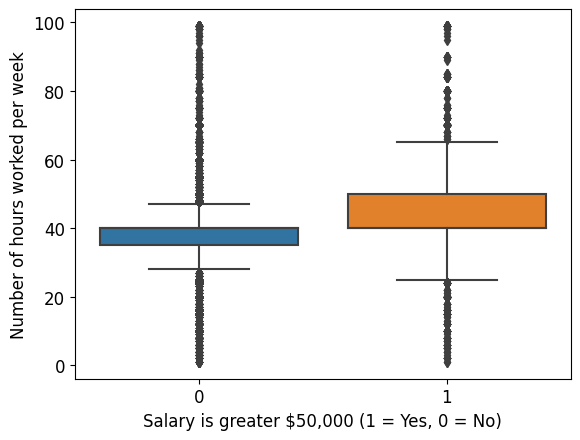

In [85]:

ax = sns.boxplot(x = df['salary'], y = df['hours-per-week'])
ax.set_xlabel('Salary is greater $50,000 (1 = Yes, 0 = No)')
ax.set_ylabel('Number of hours worked per week')

Text(0.5, 0, 'People in different income ranges 0 - <\\$50,000 1 - >\\$50,000')

<Figure size 900x900 with 0 Axes>

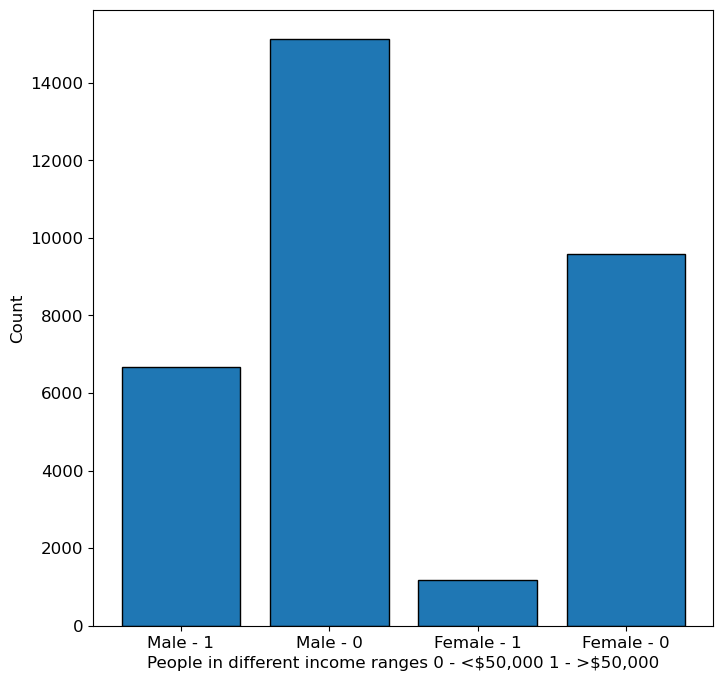

In [16]:
males_high_earning = len(df[(df['sex'] == 1) & (df['salary'] == 1)])
males_low_earning = len(df[(df['sex'] == 1) & (df['salary'] == 0)])

females_high_earning = len(df[(df['sex'] == 0) & (df['salary'] == 1)])
females_low_earning = len(df[(df['sex'] == 0) & (df['salary'] == 0)])
plt.figure(figsize=(9,9))
fig,ax = plt.subplots(figsize = (8,8))
ax.bar(['Male - 1', 'Male - 0', 'Female - 1', 'Female - 0'] , [males_high_earning, males_low_earning, females_high_earning, females_low_earning], edgecolor = 'blacK')
plt.ylabel('Count')
plt.xlabel(r'People in different income ranges 0 - <\$50,000 1 - >\$50,000')